In [1]:
!pip install xgboost

In [1]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer

In [2]:
df = load_breast_cancer()

In [3]:
data = df['data']
target = df['target']

In [4]:
data.shape

(569, 30)

In [5]:
data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
target[0]

0

In [7]:
matrix = xgb.DMatrix(data=data, label=target)

In [8]:
matrix

In [9]:
xgb_model = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=5)

In [10]:
xgb_model.fit(data, target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [11]:
y_pred = xgb_model.predict(data)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(target, y_pred)

0.9929701230228472

In [14]:
params = {'learning_rate' : 0.01, 'max_depth':5}
cv_model = xgb.cv(dtrain=matrix, params=params, nfold=3, metrics="error", as_pandas=True)

In [15]:
cv_model.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.004395,0.002489,0.070305,0.005057
1,0.004395,0.002489,0.068542,0.004301
2,0.004395,0.002489,0.068542,0.004301
3,0.004395,0.002489,0.068542,0.004301
4,0.004395,0.002489,0.068542,0.004301


In [16]:
import matplotlib.pyplot as plt

In [17]:
# cv_model.plot()

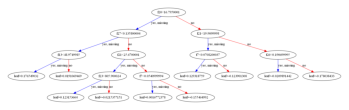

In [18]:
xgb.plot_tree(xgb_model, num_trees=1)
plt.rcParams['figure.figsize'] = [30,10]
plt.show()

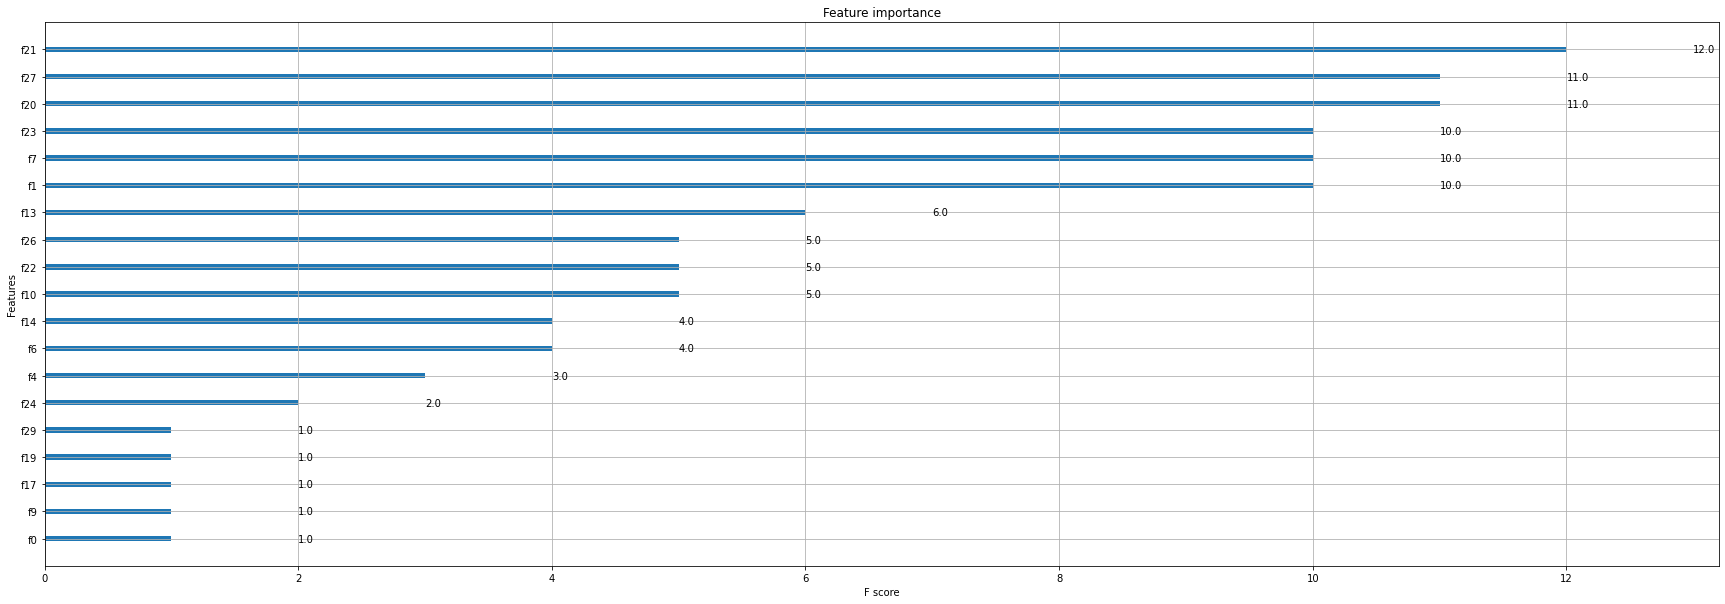

In [19]:
xgb.plot_importance(xgb_model)
plt.show()